In [ ]:
# @title Crawler for Car Of The Year 2024


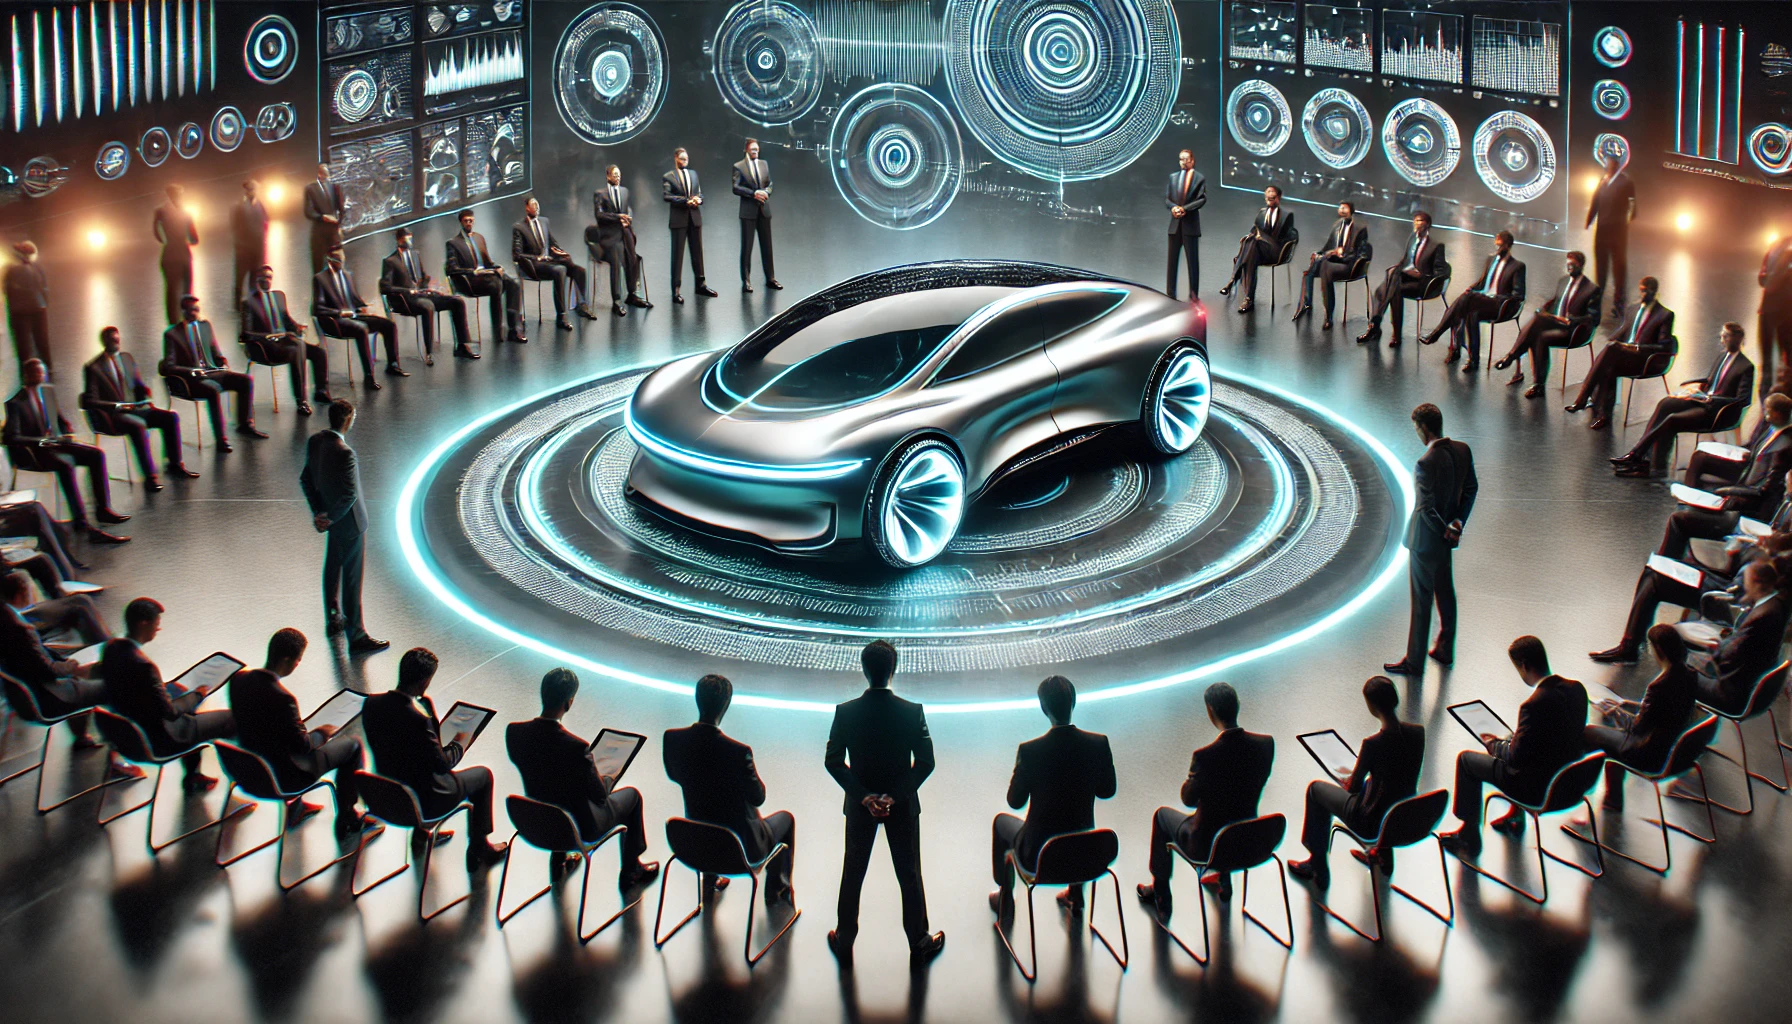

In [ ]:
pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.caroftheyear.org/voting-grid.php"
response = requests.get(url)

# Vérifiez que la requête est réussie (statut 200)
if response.status_code == 200:
    page_content = response.text
else:
    print(f"Erreur: {response.status_code}")
print(page_content)


In [2]:
soup = BeautifulSoup(page_content, 'html.parser')

# Trouver le tableau contenant les votes
div_tabla = soup.find('div', {'class': 'tabla'})
table = div_tabla.find('table')

In [ ]:
print(table)

In [ ]:
# check links
for row in table.find_all('tr'):
    # Find all table data cells (td) in the row with the class 'left'
    td_elements = row.find_all('td', class_='left')
    # Iterate over the found td elements
    for td_element in td_elements:
      a_element = td_element.find('a')
      if a_element:
        print(a_element['data-src'])

votaciones/horst-bauer.php?1726472680
votaciones/susanne-hofbauer.php?1726472680
votaciones/dieter-hubmann.php?1726472680
votaciones/joost-bolle.php?1726472680
votaciones/stephane-lemeret.php?1726472680
votaciones/jiri-duchon.php?1726472680
votaciones/soren-rasmussen.php?1726472680
votaciones/velimatti-honkanen.php?1726472680
votaciones/christophe-bourroux.php?1726472680
votaciones/florence-lagarde.php?1726472680
votaciones/guy-lhospital.php?1726472680
votaciones/yves-maroselli.php?1726472680
votaciones/stephane-meunier.php?1726472680
votaciones/sylvain-reisser.php?1726472680
votaciones/holger-appel.php?1726472680
votaciones/alexander-bloch.php?1726472680
votaciones/hanno-boblenz.php?1726472680
votaciones/stefan-cerchez.php?1726472680
votaciones/frank-mertens.php?1726472680
votaciones/helen-xenakis.php?1726472680
votaciones/zsolt-csikos.php?1726472680
votaciones/miklos-gajdan.php?1726472680
votaciones/michael-mcaleer.php?1726472680
votaciones/silvia-baruffaldi.php?1726472680
votaciones

In [8]:
import pandas as pd

# radical de l'URL
url_root = "https://www.caroftheyear.org/"

# Extraire les en-têtes du tableau
headers = [th.text.strip() for th in table.find_all('th')]

# Extraire les lignes du tableau
rows = []
for tr in table.find_all('tr')[1:]:  # Ignorer la première ligne d'en-tête
    cells = tr.find_all('td')
    row = [cell.text.strip() for cell in cells]

    # Extraire le lien de vote du jury si présent
    link = tr.find('a')
    if link:
        row.append(url_root + link['data-src'])  # Ajouter le lien
    else:
        row.append(None)  # Si aucun lien, ajouter None

    rows.append(row)

# Créer un DataFrame pandas
df = pd.DataFrame(rows, columns=headers + ['Link'])

# Afficher le DataFrame
print(df.head())


   Country              Name Renault Scenic BMW 5-series Peugeot 3008 Kia EV9  \
0  Austria       Horst Bauer              6           10            1       2   
1           Susanne Hofbauer              8           10            1       1   
2             Dieter Hubmann              4            8            3       4   
3  Belgium       Joost Bolle             10            0            5       3   
4           Stéphane Lemeret              7            1            4       3   

  Volvo EX30 BYD Seal Toyota C-HR  \
0          0        1           5   
1          2        1           2   
2          1        2           3   
3          3        4           0   
4          3        2           5   

                                                Link  
0  https://www.caroftheyear.org/votaciones/horst-...  
1  https://www.caroftheyear.org/votaciones/susann...  
2  https://www.caroftheyear.org/votaciones/dieter...  
3  https://www.caroftheyear.org/votaciones/joost-...  
4  https://www.

In [9]:
print(df.head(10))

          Country                 Name Renault Scenic BMW 5-series  \
0         Austria          Horst Bauer              6           10   
1                     Susanne Hofbauer              8           10   
2                       Dieter Hubmann              4            8   
3         Belgium          Joost Bolle             10            0   
4                     Stéphane Lemeret              7            1   
5  Czech Republic          Jiri Duchon              4            7   
6         Denmark   Søren W. Rasmussen              6            9   
7         Finland   Velimatti Honkanen              5            7   
8          France  Christophe Bourroux              9            2   
9                     Florence Lagarde              5           10   

  Peugeot 3008 Kia EV9 Volvo EX30 BYD Seal Toyota C-HR  \
0            1       2          0        1           5   
1            1       1          2        1           2   
2            3       4          1        2           3 

In [10]:
# Assuming df is your DataFrame
df.to_csv('table_caroftheyear_exhaustivelinks.csv', index=False)

from google.colab import files

# Download the file
files.download('table_caroftheyear_exhaustivelinks.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for index, row in df.iterrows():
    vote_link = row['Link']
    if vote_link:
        vote_page = requests.get(vote_link)
        vote_soup = BeautifulSoup(vote_page.text, 'html.parser')

        # Ici, vous pouvez adapter le scraping pour extraire les données spécifiques de la page de vote
        vote_details = vote_soup.find('div', {'class': 'inner'}).text.strip()
        print(f"Vote de {row['Name']}: {vote_details}")

In [15]:
import pandas as pd

# radical de l'URL
url_root = "https://www.caroftheyear.org/"

# Extraire les en-têtes du tableau
headers = [th.text.strip() for th in table.find_all('th')]

# Extraire les lignes du tableau
rows = []
for tr in table.find_all('tr')[1:]:  # Ignorer la première ligne d'en-tête
    cells = tr.find_all('td')
    row = [cell.text.strip() for cell in cells]

    # Extraire le lien de vote du jury si présent
    link = tr.find('a')
    if link:
        row.append(url_root + link['data-src'])  # Ajouter le lien
        vote_page = requests.get(url_root + link['data-src'])
        vote_soup = BeautifulSoup(vote_page.text, 'html.parser')
        # Ici, vous pouvez adapter le scraping pour extraire les données spécifiques de la page de vote
        vote_details = vote_soup.find('div', {'class': 'inner'}).text.strip()
        row.append(vote_details)  # Ajouter le détail du vote
    else:
        row.append(None)  # Si aucun lien, ajouter None

    rows.append(row)

# Créer un DataFrame pandas
df = pd.DataFrame(rows, columns=headers + ['Link', 'VoteDetails'])

# Afficher le DataFrame
print(df.head())

   Country              Name Renault Scenic BMW 5-series Peugeot 3008 Kia EV9  \
0  Austria       Horst Bauer              6           10            1       2   
1           Susanne Hofbauer              8           10            1       1   
2             Dieter Hubmann              4            8            3       4   
3  Belgium       Joost Bolle             10            0            5       3   
4           Stéphane Lemeret              7            1            4       3   

  Volvo EX30 BYD Seal Toyota C-HR  \
0          0        1           5   
1          2        1           2   
2          1        2           3   
3          3        4           0   
4          3        2           5   

                                                Link  \
0  https://www.caroftheyear.org/votaciones/horst-...   
1  https://www.caroftheyear.org/votaciones/susann...   
2  https://www.caroftheyear.org/votaciones/dieter...   
3  https://www.caroftheyear.org/votaciones/joost-...   
4  https:/

In [16]:
# Assuming df is your DataFrame
df.to_csv('table_caroftheyear_links_votedetails.csv', index=False)

from google.colab import files

# Download the file
files.download('table_caroftheyear_links_votedetails.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>